In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

C:\Users\Matheus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_all = pd.read_csv('final_data.csv')
data_nonan = data_all.dropna()
data_nocols = data_all.drop(columns = ['evaporation', 'sunshine', 'cloud9am', 'cloud3pm']).dropna()

> **Ordem dos modelos: -Logistic ---- SVM ----- KNN --- DecisionTree ---- RandomForest ----- Bagging ------ Stacking ----- LightGBM ---- XGBoost**

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
std = StandardScaler()

X_all = data_nocols.drop(columns = ['raintomorrow', 'modelo_vigente'])
# X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am',
#        'cloud3pm', 'temp9am', 'temp3pm', 'wind_speed9am',
#        'wind_speed3pm', 'latitude', 'longitude', 'altitude',
#        'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
#        'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
#        'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
#        'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
#        'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
#        'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
#        'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
#        'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
#        'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
#        'month_December', 'month_February', 'month_January', 'month_July',
#        'month_June', 'month_March', 'month_May', 'month_November',
#        'month_October', 'month_September']]
y = data_nocols.raintomorrow

X_all_std = std.fit_transform(X_all)
#X_std = std.fit_transform(X)
y_all = y

X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
#X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

svm_all = SVC(max_iter = 1000, gamma = 10)
svm_all.fit(X_all_std_train, y_all_train)
y_all_pred = svm_all.predict(X_all_std_test)

print(classification_report(y_all_test, y_all_pred))

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.86      0.65      0.74     23448
           1       0.32      0.60      0.42      6450

    accuracy                           0.64     29898
   macro avg       0.59      0.63      0.58     29898
weighted avg       0.74      0.64      0.67     29898



In [5]:
std = StandardScaler()

#X_all = data_nonan.drop(columns = ['raintomorrow'])
X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow

#X_all_std = std.fit_transform(X_all)
X_std = std.fit_transform(X)
y_all = y

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

logistic = SVC(max_iter = 1000, gamma = 10)
logistic.fit(X_std_train, y_train)
y_pred = logistic.predict(X_std_test)

print(classification_report(y_test, y_pred))

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.78      1.00      0.88     23284
           1       0.47      0.01      0.02      6614

    accuracy                           0.78     29898
   macro avg       0.63      0.50      0.45     29898
weighted avg       0.71      0.78      0.69     29898



In [6]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

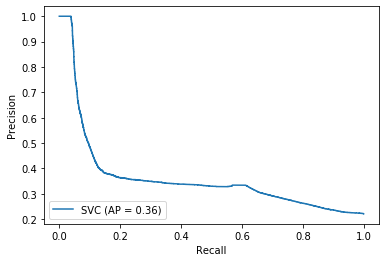

In [7]:
plot_precision_recall_curve(svm_all, X_all_std, y_all)

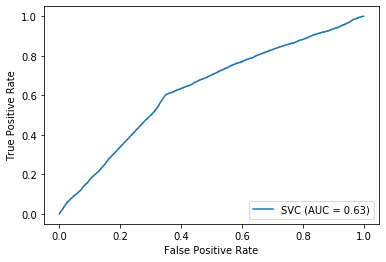

In [8]:
plot_roc_curve(svm_all, X_all_std_test, y_all_test)

C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Matheus\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


KeyboardInterrupt: 

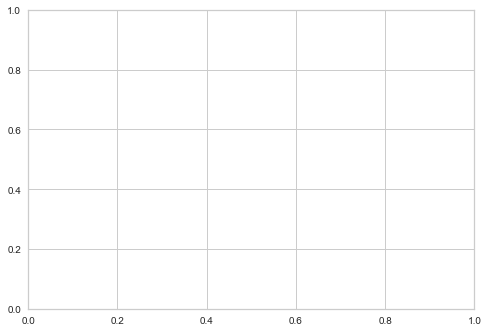

In [9]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(svm_all)

visualizer.fit(X_all_std, y_all)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figur

# KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
std = StandardScaler()

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow

X_std = std.fit_transform(X)

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(X_std_train, y_train)
y_pred = knn.predict(X_std_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     23298
           1       0.61      0.32      0.42      6600

    accuracy                           0.81     29898
   macro avg       0.72      0.63      0.65     29898
weighted avg       0.78      0.81      0.78     29898



In [17]:
std = StandardScaler()

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow

X_std = std.fit_transform(X)

#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y)

knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3)
knn.fit(X_std_train, y_train)
y_pred = knn.predict(X_std_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     23329
           1       0.58      0.37      0.45      6569

    accuracy                           0.80     29898
   macro avg       0.71      0.65      0.67     29898
weighted avg       0.78      0.80      0.79     29898



# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [34]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     23255
           1       0.62      0.51      0.56      6643

    accuracy                           0.82     29898
   macro avg       0.74      0.71      0.72     29898
weighted avg       0.81      0.82      0.81     29898



In [53]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     23353
           1       0.71      0.50      0.59      6545

    accuracy                           0.84     29898
   macro avg       0.79      0.72      0.74     29898
weighted avg       0.83      0.84      0.83     29898



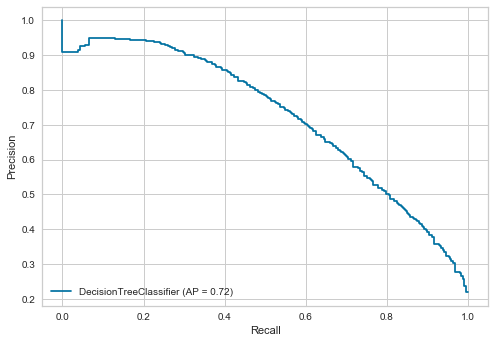

In [54]:
plot_precision_recall_curve(tree, X, y)

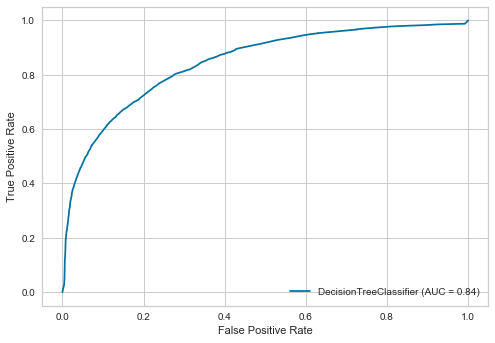

In [55]:
plot_roc_curve(tree, X_test, y_test)

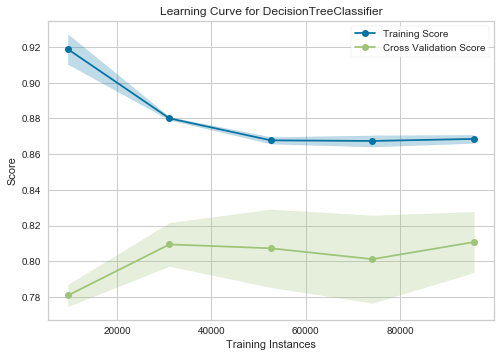

In [56]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(tree)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figur

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier

In [69]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = RandomForestClassifier(n_estimators= 200, max_depth = 5, n_jobs = -1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     23332
           1       0.87      0.24      0.38      6566

    accuracy                           0.83     29898
   macro avg       0.85      0.62      0.64     29898
weighted avg       0.83      0.83      0.78     29898



In [65]:

X = data_nocols[['humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'temp9am', 'temp3pm', 'wind_speed9am',
       'wind_speed3pm', 'latitude', 'longitude', 'altitude',
       'wind_dir9am_E', 'wind_dir9am_ENE', 'wind_dir9am_ESE', 'wind_dir9am_N',
       'wind_dir9am_NE', 'wind_dir9am_NNE', 'wind_dir9am_NNW',
       'wind_dir9am_NW', 'wind_dir9am_S', 'wind_dir9am_SE', 'wind_dir9am_SSE',
       'wind_dir9am_SSW', 'wind_dir9am_SW', 'wind_dir9am_W', 'wind_dir9am_WNW',
       'wind_dir9am_WSW', 'wind_dir3pm_E', 'wind_dir3pm_ENE',
       'wind_dir3pm_ESE', 'wind_dir3pm_N', 'wind_dir3pm_NE', 'wind_dir3pm_NNE',
       'wind_dir3pm_NNW', 'wind_dir3pm_NW', 'wind_dir3pm_S', 'wind_dir3pm_SE',
       'wind_dir3pm_SSE', 'wind_dir3pm_SSW', 'wind_dir3pm_SW', 'wind_dir3pm_W',
       'wind_dir3pm_WNW', 'wind_dir3pm_WSW', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]
y = data_nocols.raintomorrow


#X_all_std_train, X_all_std_test, y_all_train, y_all_test = train_test_split(X_all_std, y_all)
X_train, X_test, y_train, y_test = train_test_split(X, y)

tree = RandomForestClassifier(n_estimators= 200, min_samples_leaf= 200, n_jobs = -1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     23316
           1       0.79      0.38      0.52      6582

    accuracy                           0.84     29898
   macro avg       0.82      0.68      0.71     29898
weighted avg       0.84      0.84      0.82     29898



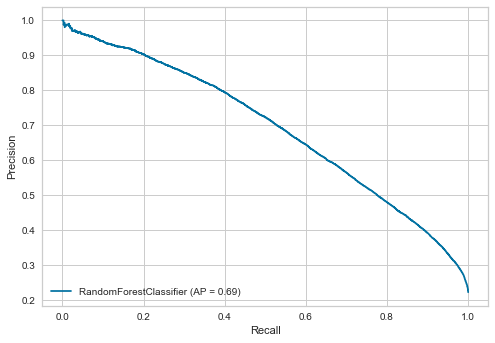

In [66]:
plot_precision_recall_curve(tree, X, y)

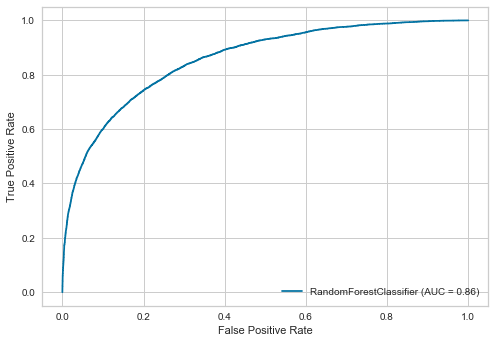

In [67]:
plot_roc_curve(tree, X_test, y_test)

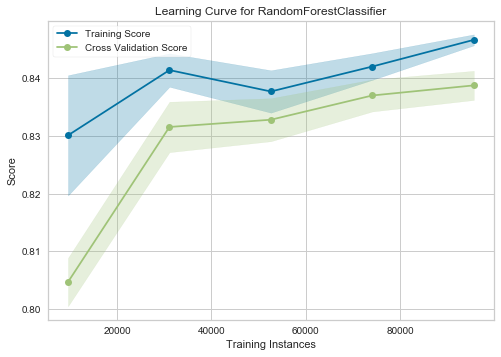

In [68]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(tree)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figur